# P6. Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In [145]:
import pandas as pd
import numpy as np

#reading datasets for the analysis

dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.head()

tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [146]:
#let's explore any missing values

dete_survey.isnull().sum()
#tafe_survey.isnull().sum()


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

**Observations:**

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.  
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.

In [147]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [148]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**Dropping columns that we won't need for the analysis**

In [149]:
columns_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns_to_drop, axis=1)


In [150]:
columns_to_drop_tefe = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns_to_drop_tefe, axis=1)

These columns were dropped because they didn't have enough relevant information that would allow us to understand the reason of why employees were leaving their companies. 

**Clean Column Names**

When joining datasets it is a good practice to have names that match the tables. Two datasets might have a column describing the same variable, but with different headers - we need to standardize this. 

In [151]:
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower()
                            .str.strip().str.replace(' ','_'))
dete_survey_updated.columns 


tafe_rename = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}        
              
tafe_survey_updated = tafe_survey_updated.rename(tafe_rename,axis='columns')
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [152]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [153]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

**Extract 'Resignation' from both dataframes **

In [154]:
resignation = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[resignation].copy()


In [155]:
#don't forget to set 'na=False' to avoid errors with Missing values
resignation_tafe = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

tafe_resignations = resignation_tafe.copy()



**Verifying the Data**

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.


In [156]:
dete_resignations['cease_date'].value_counts()

#let's extract the years

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([2][0-9]{3})', expand=False)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending = False)


2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [157]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending = False)

#slice_year = tafe_resignations[(tafe_resignations['cease_date'] >=2010) & (tafe_resignations['cease_date'] <=2013)]



2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

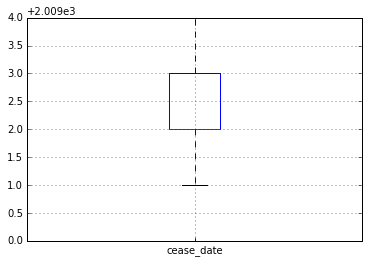

In [158]:
tafe_resignations['cease_date'].value_counts()

%matplotlib inline 
import matplotlib.pyplot as plt

tafe_resignations.boxplot('cease_date')
plt.show()



**Create a New Column**

We will be calculating how long did an employee work before resigning. We can do this by looking at dete_start_date and cease_date.

In [159]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [160]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations.head()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


**Identifying Dissatisfied Employees**


In [161]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()


def update_vals(element):
    if pd.isnull(element): #same as pd.isnull(element)
        return np.nan
    if element == '-':
        return False
    else: 
        return True
    
columns = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied']=tafe_resignations[columns].applymap(update_vals).any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.head()


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years),dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [162]:
#determining dissatisfaction in dete_survey
columns_dete = ['job_dissatisfaction','dissatisfaction_with_the_department',
               'physical_work_environment','lack_of_recognition','lack_of_job_security',
               'work_location','employment_conditions','work_life_balance','workload']

dete_resignations['dissatisfied']=dete_resignations[columns_dete].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up.head()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Up to this point, we have:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

**Merging the Datasets**

In [163]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#combined = pd.merge(left=dete_resignations_up, right = tafe_resignations_up, how='inner',
#                   left_on = 'institute_service', right_on = 'institute_service')

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
#combined.notnull().sum()
#columns_to_drop = combined.columns[combined.isnull().sum() >=500]
combined_updated = combined.dropna(axis=1,thresh=500)
#combined_updated = combined.drop(columns_to_drop, axis=1)
#combined_updated.isnull().sum()


In [164]:
combined_updated.isnull().sum()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


**Cleaning the Service Column**

In [165]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

In [166]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [167]:
#pattern = r"(?P<From_year>[1-9]?[0-9]?)?-?(?P<To_year>[1-9]?[0-9]?)?"
service = combined_updated['institute_service'].astype('str')
years = service.str.extract(r'(\d+)')
years = years.astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [168]:
def yearcat(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return 'New'
    elif element >=3 and element <7:
        return 'Experienced'
    elif element >=7 and element <11:
        return 'Established'
    else:
        return 'Veteran'

##applying Series.apply() method
combined_updated['service_cat']=years.apply(yearcat)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [169]:
combined_updated.head()
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

**Performing Initial Analysis **

In [170]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [172]:
##imputing missing values
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


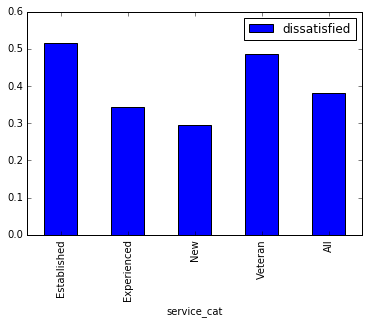

In [180]:
##Calculating the pct. of dissatisfied employes in each service category

pct = combined_updated.pivot_table(values='dissatisfied', index='service_cat', margins = True)

%matplotlib inline
pct.plot(kind='bar')
plt.show()

**Remarks**

In this project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization, we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the institute_service column
- Handled the missing values in the dissatisfied column
- Aggregated the data